# Optimalizacia a simulacia

### Jakub Ševcech, Róbert Móro

IAU, 6.12.2018

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2018-19

## Pýtať sa môžete na http://slido.com#iau2018-w12

# 1. Optimalizazia hyperparametrov

# 2. Algoritmy numerickej optimalizacie

# 3. Simulacia (Monte Carlo)

# Najskor par slov k testovacicm datam

Testovacie datasety:
https://drive.google.com/drive/folders/1C7Cn-raaGUgaV6rjdDN83DRIkAak1KDD?usp=sharing

Ak by ste si nepamatali, ktory dataset ste si vybrali, tu je zoznam priradeni:
https://drive.google.com/open?id=1JnzDn5JE-Bi5MOoJNM_kKbrXdinHpxC4PD0p18ViG_o

Znovu mate 2 subory. Treba ich spojit a spravit predikciu. Nemate stlpec *class*. ten treba predikovat. Sami si neviete overit uspesnost na tomto datasete. To spravim ja a porovnam vas.

Predikujte len ten retazec (nie cislo z tohto stlpca). vsetko malymi pismenami.

Dajte si pozor aby ste zachovali poradie pozorovani zo suboru personal_test.csv

Poradie medzi vami vyhodnotime pomocou stranky Kaggle. Vytvorili sme sutaz, kde sa mozete zapojit.
https://www.kaggle.com/t/eec47eb8933f44129560de0a7b8d16e7

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
plt.rcParams['figure.figsize'] = 6, 4

# Optimalizacia hyperparametrov (Hyperparameter Tuning)

Uz sme vam hovorili, ze existuje vela metrik na vyhodnocovanie pre regresne ulohy a aj pre klasifikacne. vzdy je dobre vyhodnocovat rozne metriky aby sme mali roznorody pohlad na to ako dobre funguje nas model: precision a recall hovoria nieco uplne ine a v roznych situaciach moze byt ina z nich dolezita (vysoky recall napriklad ak testujete pacientov - nechcete aby vam nejaky preklzol a vzdy viete pouzit dalsi test, vysoky precision ak je drahe pomylit sa ako napriklad ak hladate podvody a kazdy nespravne urceny podvod znamena zalobu od nepravom obvineneho).

Ked ale hladate najlepsi model, obycajne optimalizujete len jednu metriku. Optimalizujete vyberom algoritmu, ale aj jeho nastavovanim.

Nastavovaie parametrov modelu == hyperparameter tuning

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape
n_samples, n_features

(150, 4)

# Data maju len 4 stlpce. To znamena, ze hlbka rozhodovacieho stromu 4 by mohla stacit na dobru klasifikaciu (nie nutne).

Moze sa ale stat, ze niektory model bude chciet pouzit jeden atribut opakovane v jednej vetve stromu

## Pridame do dat 800 novych stlpcov, ktore su ale uplne nahodne a nemali by nijak prispievat k uspesnosti. Uvidime, aky vplyv na vykon podla hlbky stromu bude mat ten sum 

In [4]:
# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [5]:
X.shape

(150, 804)

## Skusme teda natrenovat nejaky stromcek

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier()
scores = cross_val_score(cls, X, y, cv=5, scoring = 'f1_macro')
scores.mean()

0.9195291258449153

Dostali sme nejaku uspesnost. Je to ale dobre cislo alebo nie? Potrebovali by sme si to overit s niecim inym. napriklad inym nastavenim modelu.

In [7]:
cls = DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(cls, X, y, cv=5, scoring = 'f1_macro')
scores.mean()

0.933266499582289

Zlepsili sme to, ale nedalo by sa to zlepsit este viac? Mozeme skusit dalsie nastavenia, ale nechce sa nam to skusat manualne. Nedalo by sa to robit nejak systematicky a automaticky?

# GridSearch

In [8]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier

cv_params = {'max_depth': [1,2,3,4] + list(range(5,10,2)), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3] }
ind_params = {'random_state': 0}
optimization = GridSearchCV(clf(**ind_params), 
                            cv_params, 
                             scoring = 'f1_macro', cv = 5, n_jobs = -1, verbose=True) 

# GridSearch sa pokusi zistit uspesnost na vsetkych moznych kombinaciach parametrov, ktore sme zadali do mriezky

In [9]:
from sklearn.model_selection import ParameterGrid
print(len(ParameterGrid(cv_params)))
list(ParameterGrid(cv_params))

28


[{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'entropy', 'max_depth': 1, 'min_sampl

In [10]:
%%time
optimization.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/

/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ganimedes/

CPU times: user 540 ms, sys: 996 ms, total: 1.54 s
Wall time: 2.14 s


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 9], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=True)

In [11]:
optimization.cv_results_ 

/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ganimedes/anacon

{'mean_fit_time': array([0.03590288, 0.03101425, 0.03089857, 0.02493086, 0.0429987 ,
        0.02918487, 0.02283988, 0.03199239, 0.03162193, 0.03265176,
        0.0367342 , 0.02934771, 0.03260541, 0.02631421, 0.03885384,
        0.06419563, 0.06616769, 0.06231027, 0.08911662, 0.09944029,
        0.08238831, 0.09546256, 0.11702123, 0.08371167, 0.08309431,
        0.07505713, 0.08254223, 0.07604122]),
 'std_fit_time': array([0.01087838, 0.01424222, 0.00808081, 0.00743731, 0.02147237,
        0.00774386, 0.00323867, 0.01721473, 0.01073679, 0.0092966 ,
        0.0043132 , 0.00749243, 0.00477677, 0.00227532, 0.00542854,
        0.02875739, 0.00541917, 0.00711051, 0.02087282, 0.01535469,
        0.01677942, 0.02029693, 0.02484387, 0.01621305, 0.01684671,
        0.01408755, 0.01389022, 0.0120433 ]),
 'mean_score_time': array([0.03695478, 0.0194725 , 0.0097692 , 0.00181274, 0.0014945 ,
        0.00465627, 0.0020051 , 0.00156889, 0.00189395, 0.00320387,
        0.0024745 , 0.00171456, 0.001949

In [12]:
list(filter(lambda x: 'best' in x, dir(optimization)))

['best_estimator_', 'best_index_', 'best_params_', 'best_score_']

In [13]:
optimization.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
optimization.best_score_

0.9332664995822889

# Velky pozor na pretrenovanie.

# Prehladavanim (manualnym alebo automatickym) priestoru parametrov pridavam dalsi stupen trenovania. Idealne by som mal mat dalsiu testovaciu vzorku, na ktorej ukazem ocakavanu uspesnost.
Tym, ze hladam najlepsiu uspesnost na testovacej vzorke pridavam dalsiu uroven trenovania a hrozi mi problem optimalizacie na testovacie data (vid. leaderboard optimization). Ak ma zaujima ocakavana uspesnost na datach, ktore model nikdy nevidel, tak by som mal mat este jednu (validacnu) vzorku, na ktorej overim len ten uplne posledny model. Uspesnost na tejto vzorke bude uspesnost, ktoru budem moct ocakavat v produkcii, na datach, ktore model nikdy nevidel.

# RandomSearch

Alternativa k GridSearchu,

Neprehladavam systematicky celu mriezku, ale skusam rozne hodnoty parametrov nahodne.

Obycajne najde riesenie velmi blizke tomu najlepsiemu z GridSearchu na ovela menej pokusov. Nemusi najst to najlepsie (ak by sa to nalepsie nahcadzalo v mriezke).

In [15]:
cv_params

{'max_depth': [1, 2, 3, 4, 5, 7, 9],
 'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 3]}

In [16]:
from scipy import stats

random_params = {
    'max_depth': stats.randint(1,10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': stats.randint(1,5)
}

Co keby som namiesto vymenovania hodnot dal nahodnu premennu?

In [17]:
from sklearn.model_selection import RandomizedSearchCV

random_optimization = RandomizedSearchCV(clf(**ind_params), param_distributions = random_params, 
                               n_iter = 10, scoring = 'f1_macro', cv = 5, verbose=True, random_state=42, n_jobs = -1)

Skusime spustit optimalizaciu s mensim poctom pokusov 

In [18]:
%%time
random_optimization.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    0.3s remaining:    0.5s


CPU times: user 288 ms, sys: 232 ms, total: 520 ms
Wall time: 1.18 s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f922dc34208>, 'criterion': ['gini', 'entropy'], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f922dc34d30>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='f1_macro', verbose=True)

In [19]:
random_optimization.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
random_optimization.best_score_

0.9113805979595452

# Viacero velmi dobrych modelov ma podobnu uspesnost. Mozno nam netreba najst ten uplne najlepsi, ale rychlo sa dostat k nejakemu velm idobremu.

In [21]:
sorted(optimization.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93327, std: 0.04716, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3},
 mean: 0.91145, std: 0.06483, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3},
 mean: 0.90647, std: 0.07443, params: {'criterion': 'entropy', 'max_depth': 4, 'mi

# Random search prehladava priestor rovnomernejsie a preto ma sancu skor najst dostatocne dobre riesenie

Nalavo: GridSearch, 
Napravo: RandomSearch

Oba prehladavaju ten isty priestor parametrov.

Pri obmedzenom pocte pokusov ma RandomSearch vacsiu sancu prist k pomerne dobremu rieseniu.

<img src="img/3_boxes.gif" alt="Drawing" style="width: 700px;"/>

Zdroj obrazku: https://sigopt.com/blog/breaking-free-of-the-grid/

Odporucam zdroj pozriet aj kvoli dalsim vylepsenim GridSearchu, ktore prezentuju.

# Dalsie zdroje

Velmi pekny priklad, kde implementuju vlastny GridSearch a RandomSearch a porovnavaju ich. Velmi pekne vysvetluju ako funguju: https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search



# Optimalizacia

Roznych optimalizacnych metod je obrovsky pocet pre rozne typy uloh.

Teraz vyberam len zopar zaujimavych a vysvetlujem ich cisto intuitivne.

Na inzinierskom stupni ale na to bude cely predmet: Prírodou inšpirované počítanie kde by sa mali brat minimalne rozne prirodou inspirovane optimalizacne algoritmy.

# Hill climbing

"Like climbing mount Everest in thick fog with amnesia"

Mylienka: Pamatat si aktualny stav a snazit sa ho lokalne vylepsit.

1. Vyhodnot inicialny stav. Ak je to cielovy stav, tak skonci.

2. Iteruj cez susedne stavy. 

> a. Ak je susedny stav cielovy, tak skonci.

> b. Ak je susedny stav lepsi ako aktualny, tak ho prehlas za aktualny a pokracuj v kroku 2.

> c. Ak susedny stav nieje lepsi ako aktualny, tak pokracuj v iteracii.

Steepest-Ascent Hill climbing vybera najlepsieho suseda

Problemy s uviaznutim v lokalnom maxime alebo na plosine. 

Riesenie dlhym skokom alebo backtrackingom.

<img src="img/hill_climbing.png" alt="Drawing" style="width: 700px;"/>

Zdroj obrazku: https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/

# Simulovane zihanie (Simulated annealing)

Snazi sa riesit problemy Hill climbingu.

Metafora z fyziky a obrabania kovov. 

Zihanie je proces, kde sa postupnym pomalym chladnutim kovu vytvara krystalicka mriezka, ktora robi kov silnejsim. Atomy kovy osciluju a postupne si nachadzaju stabilnejsie pozicie.

Simulovane zihanie je vlastne hill climbing, ktory neberie najlepsieho suseda, ale vybera suseda nahodne (pravdepodobnost zavisi od vhodnosti) a ma nejaku pravdepodobost dalekeho skosku. Pravdepodobnost skoskov s casom klesa a algoritmus sa ustaluje v globalnom maxime.  

<img src="img/Simulated_Annealing.gif" alt="Drawing" style="width: 700px;"/>

Zdroj obrazku: https://en.wikipedia.org/wiki/Simulated_annealing

# Gradientove metody (metody najstrmsieho sklonu)

Ak mame spojitu funkciu, ktoru sa snazime optimalizovat, tak mozeme spocitat derivaciu v aktualnom bode a najst dotycnicu. Ta ukazuje smer najprudsieho sklonu. Tymto smerom by sme sa mali pohnut pri optimalizacii.

Netreba pocitat hodnoty susedov, staci erivacia v aktualnom bode.

Vyhodne pouzit vo velarozmernych datach, kde by bol pocet susedov velmi velky.

Casto sa pouzivaju pri trenovani neuronovych sieti, pretoze tam predstavuje kazda vaha hrany jednu dimenziu. 

Problemy s uviaznutim.

<img src="img/gradient.png" alt="Drawing" style="width: 700px;"/>

Zdroj obrazku: https://www.hackerearth.com/blog/machine-learning/3-types-gradient-descent-algorithms-small-large-data-sets/

Na riesenie problemu uviaznutia v lokalnom minime a nastavenia spravnej rychlosti ucenia existuje kopec pristupov a vela specifickych prichuti Gradient descent algoritmu. ADAGRAD napriklad prisposobuje rychlost ucenia v procese optimalizacie. ADAM k tomu pridava momentum, ktore upravuje gradient ak sa hybe podobnym smerom opakovane. Zabezpecuje to rychlejsiu konverziu a tiez preskakovanie lokalnych minim.

# Bayesovska optimalizacia

Snazi sa trenovat zastupny model (vlavo hore) aproximujuci uspesnost modelu (vpravo hore). Jednotlive pokusy zlepsuju zastupny model. Rovnovaha medzi exploraciou (skusanie tam, kde je nizka istota zastupneho modelu - vlavo dolu) a exploataciou (skusanie tam, kde zastupny model predpoveda vysoku uspesnost - vpravo dolu)

<img src="img/bayesian_optimization.gif" alt="Drawing" style="width: 700px;"/>

zdroj obrazku: https://github.com/fmfn/BayesianOptimization/blob/master/examples/bayesian_optimization.gif

# Dalsie metody

## Geneticke/evolucne algoritmy 
Riesenie je tvorene agentom, s nejakou genetickou informaciou a fitnes funkciou. Iterativne sa vytvaraju novi agenti z predchadzajucej generacie. Najlepsi agenti sa vyberaju na zaklade fitness funkcie a upravuje sa ich geneticka informacia. Rozne mechanizmy kombinovania genetickej informacie rodicov, mutacii, vyberu najlepsich agentov, ...

## Convex optimizers
Vela metod numerickej optimalizacie predpokladajucich, ze optimalizovana funkcia ma konvexny tvar a teda nema lokalne maxima - len jedno globalne.

Hladanie rieseni na zaklade definovanych obmedzeni.

Linearne programovanie, Kvadraticke programovanie

## Swarm intelligence methods
Aloritmy inspirovane spravanim biologickych systemov: socialny hmyz (mravce, vcely), svorky/criedy/krdle zvierat

Spolupraca a sutazivost agentov

Casto optimalizacia viacerych kriterii naraz

# Teraz zmena, ideme od optimalizacie bokom do inej temy 

# Monte Carlo 

<img src="img/monte_carlo.jpg" alt="Drawing" style="width: 700px;"/>

## simulacia 

# Monte Carlo simulacia 

Vnalezca Stanislaw Ulam. Americko-Polsky matematik. Znamy pracou na projekte Manhattan. 

Pribeh hovori, ze ked bol v nemocnici chory, tak sa z nudy snazil spocitat pravdepodobnost vyry v hre Solitair. Kombinatoricky to bolo prilis zlozite spocitat, tak to spolu s Johnom von Neumannon skusili spocitat simulaciou na pocitaci Eniac.

Vymyslel tak Monte carlo simulaciu.

Metoda na odhadnutie neznamej hodnoty pomocou principov inferencnej statistiky

Ak vyberieme vzorku z populacie **nahodne**, vozrka ma sklon vykazovat rovnake vlastnosti ako cela populacia. Co je vlastne princip inferencenj statistiky. 

Ak dokazeme pocitat nejaku zaujimavu hodnotu pre dostatocne velku vzorku pozorovani, tak sa jej hodnota ustabilizuje a my ju mozeme pouzit ako odhad skutocnej hodnoty.

Velmi dobry zdroj: https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/

## Pouzime simulaciu na porovnanie roznych strategii hrania hry Roulette

Chceme zistit ktora z dvoch strategii ma vyssi stredny ocakavany zarobok po dajme tomu 100 hrach.

Nevieme spocitat zarobok pre vsetky mozne priebehy 100 opakovani hry. Ten priestor moznych priebehovje obrovsky. Vieme ale vybrat vzorku hier a spocitat priemerny zarobok pre ne. Ak su vzorky vybrane nahodne, tak odhadovany priemer by sa mal spravat rovnako ako skutocny priemer pre celu populaciu. Samzorejme s nejakou mierou istoty.

## Roulette

Kruh rozdeleny na 37 dielikov (Europska verzia, Americka ma 38)

Dieliky ocislovane 0-36 (Americka ma 2x0)

Do roztoceneho kolesa krupier vhodi lopticku. Ta sa zastavi na niektorom dieliku.

Rovnomerne rozdelenie pravdepodobnosti zastavenia lopticky pre rozne dieliky.

Mozne stavit na farbu (cierna/cervena), parn/nepar, presne cislo, rozne skupiny cisel na hracom stole. 

<img src="img/roulette.png" alt="Drawing" style="width: 700px;"/>

Dolezita cast - to nenapadne zelene policko - pri policku 0 vyhrava kasino P(0) = 1/37 (2/38 v americkej verzii)=> ** Negative sum game **

Negative sum game = rozdiel suctu vsetkych vyhier a vsetkych vkladov hracov je negativny. Hraci do hry spolu vlozili viac ako mozu spolu vyhrat. Cast ide nejakemu bookmakerovi / krupierovi / kasinu ... 

V roznych hrach je rozny mechanizmus ako toto dosiahnut. 

## Podme si implementovat jednoduchu ruletu

In [22]:
from random import randint

# Pre jednoduchost budeme riesit len stavku na farbu (vzdy cervenu).
def roulette_round():
    values = {0: "c", 32 : "r", 15: "b", 19: "r", 4: "b", 21: "r", 2: "b", 25: "r", 17: "b", 34: "r", 6: "b", 27: "r", 13: "b", 36: "r", 11: "b", 30: "r", 8: "b", 23: "r", 10: "b", 5: "r", 24: "b", 16: "r", 33: "b", 1: "r", 20: "b", 14: "r", 31: "b", 9: "r", 22: "b", 18: "r", 29: "b", 7: "r", 28: "b", 12: "r", 35: "b", 3: "r", 26: "b"}
    draw = randint(0,36)
    return values[draw] == "r"
    
    
roulette_round()

True

## Velmi jednoducha strategia, opakovane stavkovat rovnaku sumu stale na tu istu farbu

In [23]:
class Simple:
    def __init__(self, credit, wager, round_count):
        self.credit = credit
        self.wager = wager
        self.round_count = round_count
        
    def run(self):
        history = []
        for _ in range(self.round_count):
            if roulette_round():
                self.credit += self.wager
            else:
                self.credit -= self.wager
                
            history.append(self.credit)
        return history
    
s = Simple(1000, 100, 100)
s.run()        

[900,
 1000,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1400,
 1500,
 1400,
 1500,
 1600,
 1500,
 1400,
 1300,
 1400,
 1500,
 1400,
 1300,
 1400,
 1500,
 1400,
 1500,
 1400,
 1500,
 1400,
 1300,
 1400,
 1500,
 1400,
 1300,
 1400,
 1500,
 1400,
 1300,
 1200,
 1300,
 1200,
 1100,
 1000,
 1100,
 1200,
 1300,
 1200,
 1300,
 1200,
 1300,
 1400,
 1300,
 1200,
 1100,
 1200,
 1300,
 1200,
 1100,
 1000,
 1100,
 1200,
 1300,
 1400,
 1300,
 1400,
 1500,
 1600,
 1500,
 1400,
 1500,
 1400,
 1300,
 1400,
 1300,
 1400,
 1300,
 1200,
 1100,
 1000,
 1100,
 1000,
 900,
 1000,
 900,
 800,
 700,
 800,
 900,
 800,
 900,
 800,
 900,
 1000,
 1100,
 1000,
 1100,
 1000,
 1100,
 1000,
 1100,
 1000]

## Strategia Martingale 

* zvdojnasobit stavku pri prehre
* polovicna stavka po vyhre
* spoliehat sa na to, ze musim raz vyhrat a velkou stavkou napravit predchadzajuce prehry

In [24]:
class Martingale:
    def __init__(self, credit, wager, round_count):
        self.credit = credit
        self.wager = wager
        self.round_count = round_count
        
    def run(self):
        history = []
        for _ in range(self.round_count):
            if roulette_round():
                self.credit += self.wager
                self.wager = self.wager // 2
            else:
                self.credit -= self.wager
                self.wager = self.wager * 2
                
            history.append(self.credit)
        return history
    
m = Martingale(1000, 100, 100)
m.run()        

[900,
 700,
 300,
 -500,
 1100,
 1900,
 1500,
 700,
 -900,
 -4100,
 -10500,
 2300,
 8700,
 11900,
 13500,
 14300,
 14700,
 14900,
 14800,
 14600,
 15000,
 14800,
 15200,
 15000,
 15400,
 15600,
 15500,
 15700,
 15600,
 15800,
 15700,
 15900,
 15800,
 16000,
 15900,
 15700,
 15300,
 14500,
 16100,
 15300,
 16900,
 17700,
 17300,
 18100,
 18500,
 18700,
 18800,
 18750,
 18650,
 18850,
 18950,
 19000,
 19025,
 19037,
 19043,
 19046,
 19045,
 19047,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048,
 19048]

## Spustime simulaciu vela krat a budeme si odkladat priebezne hodnoty kreditu pre simulovanych hracov

vznikne nam dvojrozmerne pole. Vyvoj kreditu kazdeho hraca

In [25]:
%%time
s_results = []
for _ in range(10000): # pocet opakovani simulacie
    s = Simple(1000, 100, 100)
    s_results.append(s.run())
    
s_results = np.array(s_results)

CPU times: user 3.94 s, sys: 60 ms, total: 4 s
Wall time: 4 s


In [26]:
# Posledny stlpec su vysledne sumy
s_results[:,-1] 

array([ 400, -400,  800, ..., -600, -400, 1200])

# Kedze teraz uz mame vela realizacii simualcie, tak mozeme zacat robit odhady toho, co mozeme ocakavat a ake su pravdepdoobnosti

In [27]:
pd.Series(s_results[:,-1]).describe()

count    10000.000000
mean       737.420000
std       1004.647538
min      -2600.000000
25%          0.000000
50%        800.000000
75%       1400.000000
max       4400.000000
dtype: float64

Cize v priemere sme skoncili na cca 700 euroach. menej ako 1000 na zaciatku, takze v priemere prerobime. 

## Mozeme sa pozriet na rozdelenie, aby sme vedeli kde je sustredena vysledna vyhra. 

(array([  21.,   71.,  140.,  535.,  751., 1125., 2177., 1507., 1404.,
        1413.,  485.,  229.,  117.,   17.,    8.]),
 array([-2600.        , -2133.33333333, -1666.66666667, -1200.        ,
         -733.33333333,  -266.66666667,   200.        ,   666.66666667,
         1133.33333333,  1600.        ,  2066.66666667,  2533.33333333,
         3000.        ,  3466.66666667,  3933.33333333,  4400.        ]),
 <a list of 15 Patch objects>)

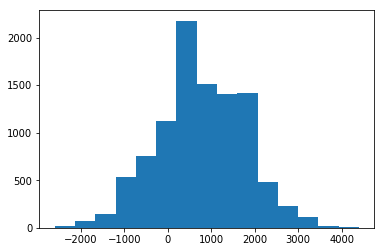

In [28]:
plt.hist(s_results[:,-1], bins=15)

Cize hlavna vaha rozdelenia je trochu posunuta k nizsim hodnotam.

# Kolko bolo takych, ktorym zostalo aspon nieco z povodneho kreditu?

In [29]:
sum(s_results[:,-1] > 0)

7357

# Kolko bolo takych, ktori aj nieco  zarobili?

In [30]:
sum(s_results[:,-1] > 1000)

3673

Cize mame cca 34% sancu, ze s takto nastavenou strategiou zarobime

strategia je 100 x stavit na farbu (je jedno aku, my sme zhodou okolnosti davali tu istu, ale dufam, ze mi budete verit, ze rovnaky vysledkov by sme dostali aj ked by sme farbu menili)

# Mala odbocka - co je to Gambler's fallacy (Gamblerov klam / chybny zaver)

Stalo sa vam uz, ze ste napriklad hadzali mincou a opakovane vam padla ta ista hodnota. Intuitivne ste ocakavali, ze pri dalsom hode uz musi padnut opacna strana. Ze je vacsia pravdepodobnost, ze padne ta druha hodnota, ked uz niekolko krat za sebou padla ta ista? Aby sa nejak vyrovnala ta nepravdepodobna situacia, ze padla vela krat za sebou rovnaka hodnota?

18.8.1913 v kasine v Monte Carlo padla na rulete cierna farba **26** krat za sebou.

Vsetci stavkovali proti ciernej lebo verili, ze v dalsom hode uz musi spadnut cervena. 

* Pravdepodobnost, ze padne cierna 26 krat za sebou: 1/67 108 865

* Pravdepodobnost, ze padne cierna 26 krat za sebou ak uz predtym padla 25 krat: 18/37 ~ 1/2

Kazdy hod je nezavisly, pravdepodobnost kazdeho jedneho je rovnaka. Nijak sa nemeni s predchadzajucimi hodnotami.

Bol to najlepsi den v historii pre to kasino. Nie az tak pre tych hracov.

## Spat k nasej simulacii - jednoducha strategia nieje velmi uzitocna

## Co strategia Martingale?

In [31]:
%%time

m_results = []
for _ in range(10000):
    m = Martingale(1000, 100, 100)
    m_results.append(m.run())
    
m_results = np.array(m_results)

CPU times: user 4 s, sys: 64 ms, total: 4.07 s
Wall time: 4.12 s


In [32]:
pd.Series(m_results[:,-1]).describe()

count    1.000000e+04
mean     3.406135e+10
std      5.605464e+12
min     -2.956189e+14
25%      2.043000e+03
50%      2.342350e+04
75%      8.317725e+05
max      4.720221e+14
dtype: float64

Tu su tie vyhry podstatne zaujimavejsie. Aj 25% percentil je viac ako dvojnasobok vkladu. Cize mame viac ako 75% sancu, ze zdojnasobime vklad. Ta satndardna odchykla a extremy su ale dost sialene. Maximim je skoro bilion !!!

# Kolko ludom na konci nieco zostalo?

In [33]:
sum(m_results[:,-1] > 0)

9656

# A kolko aj nieco zarobilo?

In [34]:
sum(m_results[:,-1] > 1000)

9652

To je uplna parada, 95% sanca, ze zarobime.

# Na co by sme sa mohli este v tych datach pozriet?

* confidence intervaly
* histogramy
* vyvoj kreditu jednotlivych hracov

### Skusme sa pozriet na ten vyvoj kreditu

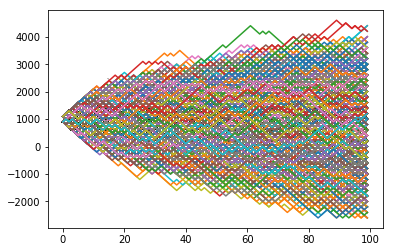

In [35]:
_ = plt.plot(s_results.T)

Toto vyzera ako papagaj.

Clovek nevie vnimat prilis velke mnozstvo informacii nara. Toto je ocividne zahltenie. 

Pri tak velkom mnozstve ciar nam ich farbicky nepomahaju odlisovat. Su tam teda zbytocne. Dajme farbicky prec.

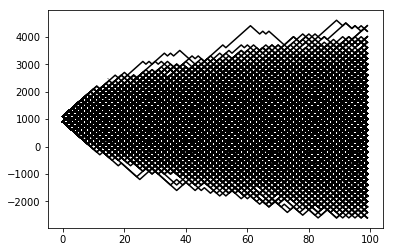

In [36]:
_ = plt.plot(s_results.T, color='black')

Velmi sme to nevylepsili. Uz tam al aspon niesu vsetky farby duhy, ktore by sme aj tak nevedeli interpretovat a nemali zmysel.  

Chcelo by tam nejak zobrazit hustotou tych ciar. 

Nieco take sa da dosiahnut cez priesvitnost ciar.

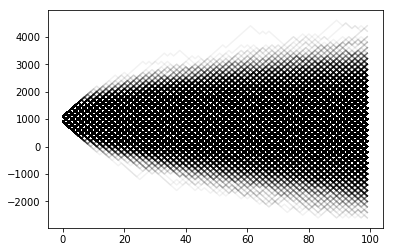

In [37]:
_ = plt.plot(s_results.T, color='black', alpha = 0.05)

Ked vam nejde o jednotlive pozorovania, ale skor nejaku ich hustotu v priestore, tak priesvitnost je celkom dobry napad. 

Velmi casto sa to pouziva napriklad v scatterplotoch.

Pozor, aj priesvitnost ma svoje obmedzenia. ked je pocet ciar / bodov extremne vysoky, tak ani priesvitnost nepomoze a treba siahnut po inych kladivach.

Vidime, ze vacsina ciar sa drzi niekde v strede okolo 1000, ale niektore idu do extremov. Tych je ale podstatne menej.

Toto sme ciastnocne videli aj v histograme. Tu sme ale pridali dalsi rozmer a vidime priebeh pocas celych hier.

## Zopakujme to iste pre Martingale

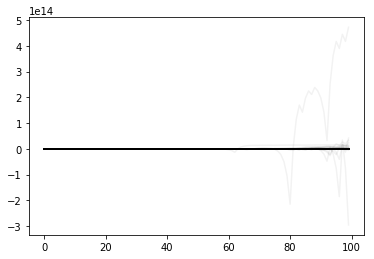

In [38]:
_ = plt.plot(m_results.T, color='black', alpha = 0.05)

Tu nevidime skoro nic. Potrebovali by sme logaritmicky y-ovu os

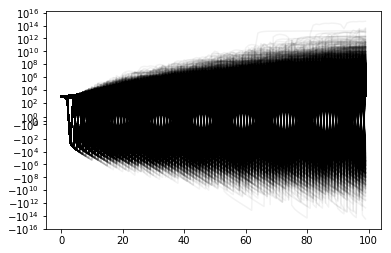

In [39]:
_ = plt.plot(m_results.T, color='black', alpha = 0.05)
plt.yscale('symlog')

Toto je velmi podobne ako pri druhej strategii, len su tam vacsie extremy a zda sa, ze menej zapornych hodnot.

# Nasa simulacia ale nezodpoveda realite. Mame tam chybu

Viete povedat aku?

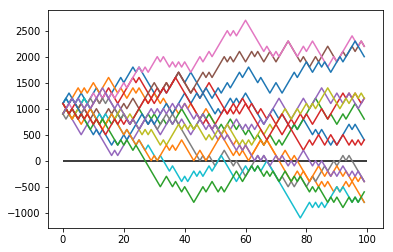

In [40]:
_ = plt.plot(s_results[:15].T)
plt.hlines(0, 0, 100)

# Ked vam v kasine dojdu peniaze, tak idete domov. V nasej simulacii hrate na dlh.

Skusme upravit simulaciu tak aby ste nevedeli hrat na dlh.

In [41]:
class Simple2:
    def __init__(self, credit, wager, round_count):
        self.credit = credit
        self.wager = wager
        self.round_count = round_count
        
    def run(self):
        history = []
        for _ in range(self.round_count):
            if roulette_round():
                self.credit += min(self.credit, self.wager)
            else:
                self.credit -= min(self.credit, self.wager)
                
            history.append(self.credit)
        return history     

In [42]:
class Martingale2:
    def __init__(self, credit, wager, round_count):
        self.credit = credit
        self.wager = wager
        self.round_count = round_count
        
    def run(self):
        history = []
        for _ in range(self.round_count):
            if roulette_round():
                self.credit += self.wager
                self.wager = self.wager // 2
            else:
                self.credit -= self.wager
                self.wager = min(self.credit, self.wager * 2) 
                
            history.append(self.credit)
        return history
    

In [43]:
%%time

s2_results = []
for _ in range(10000):
    s = Simple2(1000, 100, 100)
    s2_results.append(s.run())
    
s2_results = np.array(s2_results)

CPU times: user 6.2 s, sys: 48 ms, total: 6.25 s
Wall time: 6.25 s


In [44]:
pd.Series(s2_results[:,-1]).describe()

count    10000.000000
mean       783.180000
std        848.868155
min          0.000000
25%          0.000000
50%        600.000000
75%       1400.000000
max       5200.000000
dtype: float64

In [45]:
sum(s2_results[:,-1] > 1000)

3352

In [46]:
pd.Series(s_results[:,-1]).describe()

count    10000.000000
mean       737.420000
std       1004.647538
min      -2600.000000
25%          0.000000
50%        800.000000
75%       1400.000000
max       4400.000000
dtype: float64

In [47]:
sum(s_results[:,-1] > 1000)

3673

Pocet takych, co zarobili zostal cca rovnaky, priemerna ocakavana suma sa trochu zlepsila lebo nam to ti negativni netahaju dolu.

In [48]:
%%time

m2_results = []
for _ in range(10000):
    m = Martingale2(1000, 100, 100)
    m2_results.append(m.run())
    
m2_results = np.array(m2_results)

CPU times: user 5.06 s, sys: 0 ns, total: 5.06 s
Wall time: 5.08 s


In [49]:
pd.Series(m2_results[:,-1]).describe()

count    10000.000000
mean       860.128900
std       1785.405814
min          0.000000
25%          0.000000
50%          0.000000
75%       1373.000000
max      64175.000000
dtype: float64

(array([9.855e+03, 1.220e+02, 1.500e+01, 5.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  6417.5, 12835. , 19252.5, 25670. , 32087.5, 38505. ,
        44922.5, 51340. , 57757.5, 64175. ]),
 <a list of 10 Patch objects>)

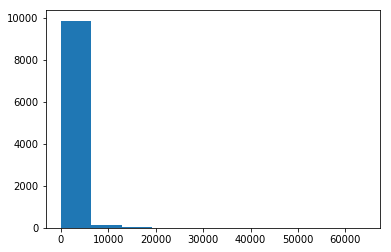

In [50]:
plt.hist(m2_results[:,-1])

In [51]:
sum(m2_results[:,-1] > 1000)

3642

In [52]:
pd.Series(m_results[:,-1]).describe()

count    1.000000e+04
mean     3.406135e+10
std      5.605464e+12
min     -2.956189e+14
25%      2.043000e+03
50%      2.342350e+04
75%      8.317725e+05
max      4.720221e+14
dtype: float64

In [53]:
sum(m_results[:,-1] > 1000)

9652

Pri strategii Martingale je obrovsky rozdiel po uprave. Zrazu zmizlo velmi vela extremnych hodnot a pribudlo velmi vela bankrotov. Uz sa to nezda ako az taka dobra strategia.

## Skusme sa pozriet na priebehy kreditov

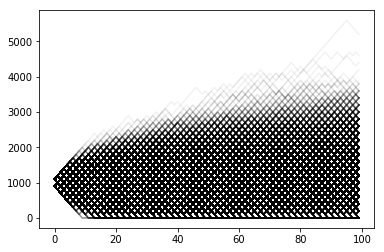

In [54]:
_ = plt.plot(s2_results.T, color='black', alpha = 0.05)

Ked raz zbankrotujem, tak uz sa z toho nedostanem

## To iste pre martingale

Teraz uz nepotrebujem ani tu logaritmicku mierku na y-ovej osi.

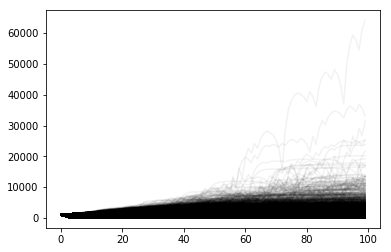

In [55]:
_ = plt.plot(m2_results.T, color='black', alpha = 0.05)
# plt.yscale('log')

Cize martingale ako tak funguje ak mozete ist do neobmedzeneho dlhu. V realite vam to ale asi tazko niekto dovoli. V realite mate malu sancu na velmi vysoku vyhru, ale ovela vacsiu sancu, ze pridete o vsetko.

# A co sa stane ak by sme hrali dlho?

Doteraz sme vzdy spravili 100 stavok (ak sme mali na to peniaze)

Simple2 bola stabilnejsia strategia. Co sa stane ak budem stavkovat dlho. napriklad 10000 krat.

In [56]:
%%time

sl_results = []
for _ in range(1000): # tu ich dam simulovat len 1000 leb osa mi nechce cakat
#     s = Simple2(1000, 100, 100)
    s = Simple2(1000, 100, 10000) # zmenil som dlzku hrania pre kazdeho agenta
    sl_results.append(s.run())
    
sl_results = np.array(sl_results)

CPU times: user 45.8 s, sys: 132 ms, total: 46 s
Wall time: 46.3 s


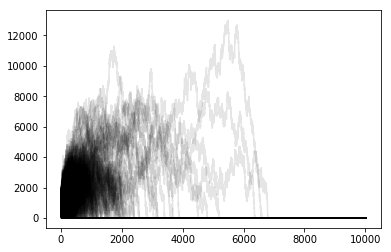

In [57]:
_ = plt.plot(sl_results.T, color='black', alpha = 0.1)

## Pocet takych, ktori zarobili alebo aspon nezbankrotovali

In [58]:
sum(sl_results[:,-1] > 1000)

0

In [59]:
sum(sl_results[:,-1] > 0)

0

In [60]:
pd.Series(sl_results[:,-1]).describe()

count    1000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

# Cize pri dlhom hrani takmer urcite prerobite. 

Toto je vplyv **negative sum game**

Aj mala nesymetria (1/37) pri opakovanych pokusoch spravi obrovsky efekt.

Nikdy sa nepokusajte gamblovat na negative sum game, kde ide len o nahodu.

Ine priklady negative sum game kde ide len o nahodu: ruska ruleta, vacsina loterii (vynimkou su len ojedinele chyby v nastaveni pravidiel)

Negative sum game, kde sa daju pouzit schopnosti na prekonanie negativneho faktoru: obchodovanie a burze, stavkovanie na sporty

Vas model ale musi byt tak dobry, ze prekona aj poistku druhej strany (0 v rulete, znizeny kurz v stavkovani, remiza v black jacku, poplatky za transakcie na burze)

Ked uz chcete gamblovat, tak hladajte **zero sum game** kde viete zapojit schopnosti a stante sa fakt dobrymi.

Ak sa niekedy dozviete o nejakej **positive sum game**, kde aj vyplacaju vyhry, tak poprosim tip :)

# Spat k Monte Carlo simulaciam

Uzitocne pri odhadovani nejakej neznamej hodnoty. Vyhodnotenie na dostatocne velkej nahodnej podmnozine produkuje stabilne vysledky. Dolezite je sledovat aj stabilitu vysledkov napriklad pomocou confidence intervalov alebo standardnej odchylky. Pri rastucom pocte simulacii by mala sledovana metrika konvergovat.

# Kde sa Monte Carlo pouziva?

* Predpoved pocasia
* Predpoved demografickeho vyvoja - kolko ludi bude v dochodkovom veku o 50 rokov ak pozname zakladne statisticke informacie o populacii?
* Overovanie obchodovacich strategii na burze
* Vypocet sily atomovej bomby
* Simulacia dopravnej situacie
* ...

<img src="img/long_light.png" alt="Drawing" style="width: 700px;"/>

# Co si zobrat z tejto prednasky

* Optimalizujte hyperparametre. Mozete vasmu algoritmu dost pomoct.

* Neprehanajte to ale velmi. Moze sa vam stat, ze sa preucite na validacnu vzorku a na testovacich datach budete mat horsiu uspesnost ako ocakavate.

* Informovane optimalizacne metody vedia velmi urychlit prehladavanie priestoru hyperparametrov.

* Existuje velmi vela optimalizacnych metod uzitocnych v roznych domenach.

* Simulacie nam umoznuju odhadnut neznamu hodnotu, ktoru by sme inak pocitali len velmi tazko.

* Nestavkujte na negative sum game, kde nejde o zrucnost ale len o nahodu. Je to ekvivalentne ruskej rulete.